Week 1

Day 3

In [29]:
import pandas as pd

In [30]:
df = pd.read_csv(r'C:\Users\acer\Desktop\Infinity AI Work\InfinityStyleVerse\data\raw\product_esg.csv')

In [31]:
# This will calculate the sustainability score
def calculate_esg(row):
    score = 0
    
    # Material sustainability - 30 points
    sustainable_materials = ['organic cotton', 'hemp', 'recycled cotton', 'recycled polyester', 'linen', 'recycled nylon', 'bamboo fabric', 'vegan leather']
    if row['material'].lower() in sustainable_materials:
        score += 30
    
    # Water usage - 10 points if below 1,000,000 liters and otherwise will be scaled 
    water_threshold = 1000000
    if pd.notna(row['water_use']) and row['water_use'] < water_threshold:
        score += 10
    elif pd.notna(row['water_use']):
        # Scaling the water score inversely (max 10 at 0 liters, 0 at 3 000 000+ liters)
        water_score = max(0, 10 - (row['water_use'] / 300000))
        score += water_score
    
    # Carbon emission - 20 points if below 250 MT
    if pd.notna(row['carbon_emission']) and row['carbon_emission'] < 250:
        score += 20
    
    # Recyclable - 10 points
    if row['recyclable'] == True:
        score += 10
    
    # Ethical rating - max 30 points, scaled from 1-5
    if pd.notna(row['ethical_rating']):
        ethical_score = min(5, row['ethical_rating']) * 6  
        score += ethical_score
    
    return score

In [32]:
# Testing with 3 rows
test_rows = [0, 1, 3]  
for idx in test_rows:
    row = df.iloc[idx]
    esg_score = calculate_esg(row)
    print(f"Product ID: {row['product_id']}, Material: {row['material']}, Country: {row['country']}, Water Use: {row['water_use']}, Carbon Emission: {row['carbon_emission']}, Recyclablility: {row['recyclable']}, Ethical Rating: {row['ethical_rating']}, Score: {esg_score}")

Product ID: 1, Material: Tencel, Country: Australia, Water Use: 4511152.79, Carbon Emission: 1.75, Recyclablility: False, Ethical Rating: 2, Score: 32
Product ID: 2, Material: Vegan Leather, Country: Japan, Water Use: 1951566.31, Carbon Emission: 124.39, Recyclablility: False, Ethical Rating: 2, Score: 65.49477896666667
Product ID: 4, Material: Bamboo Fabric, Country: Italy, Water Use: 899576.9, Carbon Emission: 152.04, Recyclablility: False, Ethical Rating: 2, Score: 72


Day 4

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\acer\AppData\Local\Temp\ipykernel_23088\2664284862.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='material', y='esg_score', data=df, estimator='mean', ci=None)


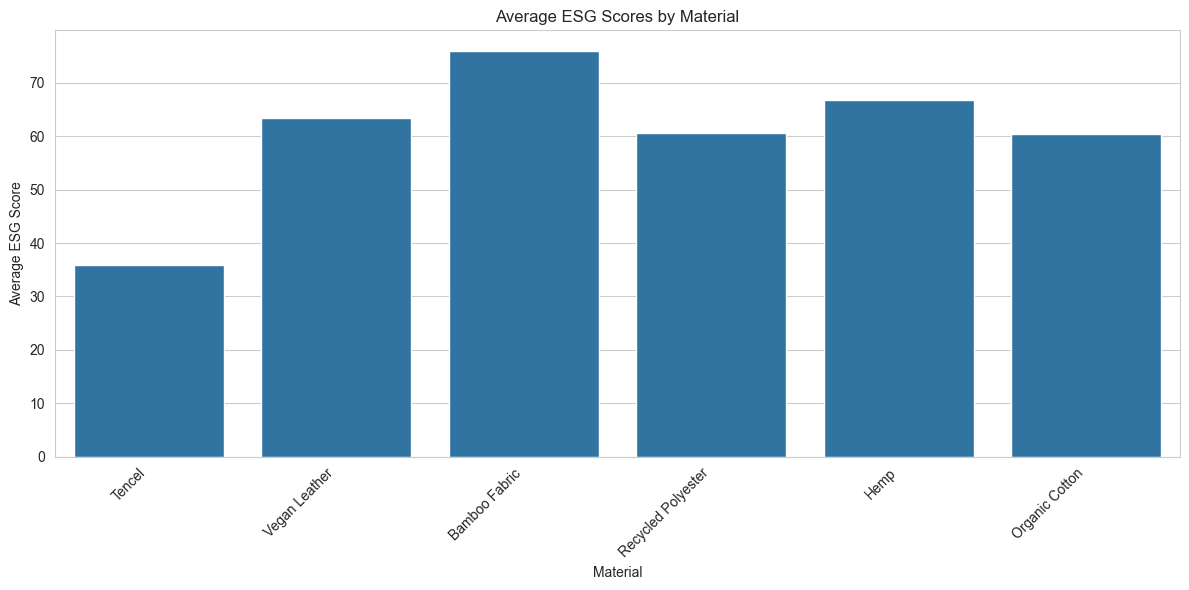

C:\Users\acer\AppData\Local\Temp\ipykernel_23088\2664284862.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='country', y='esg_score', data=df, estimator='mean', ci=None)


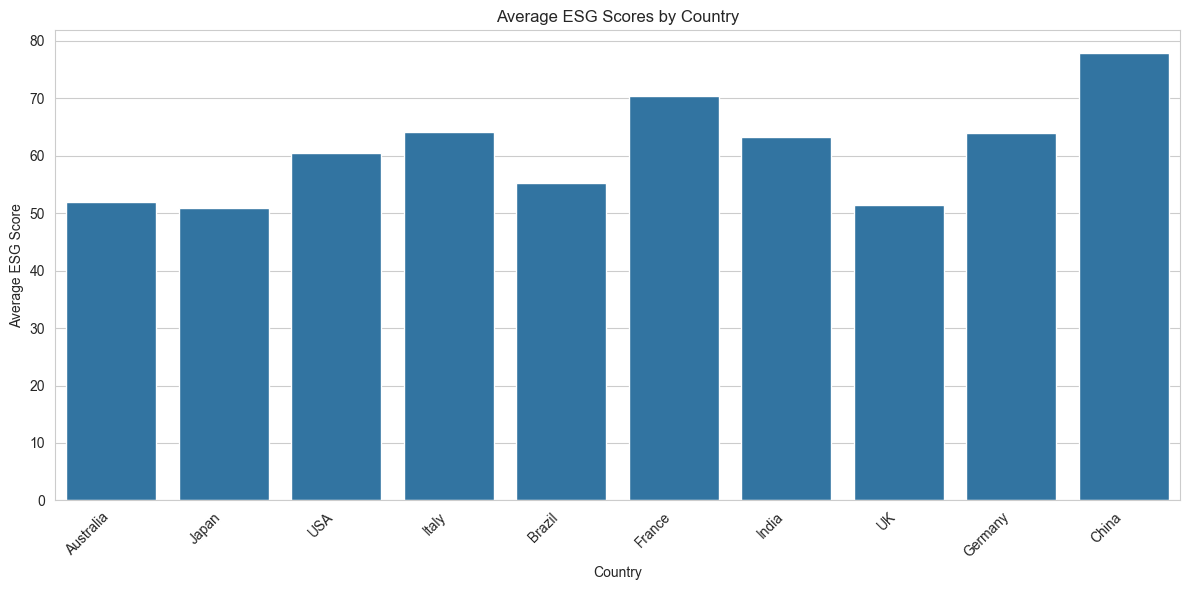

In [34]:
# Applying the function to the entire data frame
df['esg_score'] = df.apply(calculate_esg, axis=1)

# Visualize ESG scores by material
plt.figure(figsize=(12, 6))
sns.barplot(x='material', y='esg_score', data=df, estimator='mean', ci=None)
plt.title('Average ESG Scores by Material')
plt.xlabel('Material')
plt.ylabel('Average ESG Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize ESG scores by country
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='esg_score', data=df, estimator='mean', ci=None)
plt.title('Average ESG Scores by Country')
plt.xlabel('Country')
plt.ylabel('Average ESG Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [35]:
# Top sustainable materials
top_materials = df.groupby('material')['esg_score'].mean().sort_values(ascending=False).head(3)
print("Top 3 sustainable materials (average ESG score):")
print(top_materials)
print()

# Least eco-friendly items
least_eco_friendly = df.nsmallest(3, 'esg_score')[['product_id', 'material', 'country', 'esg_score']]
print("Least eco-friendly items (lowest ESG scores):")
print(least_eco_friendly)
print()

# Average ESG score by country
avg_score_by_country = df.groupby('country')['esg_score'].mean().sort_values(ascending=False)
print("Average ESG score by country:")
print(avg_score_by_country)
print()


Top 3 sustainable materials (average ESG score):
material
Bamboo Fabric    76.036530
Hemp             66.862134
Vegan Leather    63.508775
Name: esg_score, dtype: float64

Least eco-friendly items (lowest ESG scores):
    product_id material    country  esg_score
7            8   Tencel     Brazil  18.000000
42          43   Tencel      Italy  25.510222
0            1   Tencel  Australia  32.000000

Average ESG score by country:
country
China        77.900969
France       70.355449
Italy        64.050401
Germany      63.971903
India        63.270017
USA          60.467818
Brazil       55.212966
Australia    51.923588
UK           51.479335
Japan        50.829343
Name: esg_score, dtype: float64



Week 2

Day 1

In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import os
import joblib

In [37]:
# Loading data
data = r'C:\Users\acer\Desktop\Infinity AI Work\InfinityStyleVerse\data\raw\product_esg.csv'
df = pd.read_csv(data)

In [38]:
# Calculating esg scores 
if 'esg_score' not in df.columns:
    df['esg_score'] = df.apply(calculate_esg, axis=1)

In [39]:
# Handling missing values
df = df.dropna(subset=['water_use', 'carbon_emission', 'ethical_rating', 'esg_score'])

In [40]:
# Features and target
X = df[['water_use', 'carbon_emission', 'ethical_rating']]
y = df['esg_score']

In [41]:
# Splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Training the model
model = LinearRegression().fit(X_train, y_train)

In [43]:
# Predicting on the test set
y_pred = model.predict(X_test)

In [44]:
# Metrics
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Absolute Percentage Error: {mape:.2f}%")
print(f"Mean Squared Error: {mse:.2f}")

Mean Absolute Error: 11.17
Mean Absolute Percentage Error: 24.21%
Mean Squared Error: 194.60


In [45]:
# Intercept and coefficients
print(f"Intercept: {model.intercept_:.2f}")
coefficients = pd.DataFrame({'Feature':X.columns, 'Coefficient':model.coef_})
print("\nModel Coefficients: ")
print(coefficients)

Intercept: 57.92

Model Coefficients: 
           Feature  Coefficient
0        water_use    -0.000002
1  carbon_emission    -0.047601
2   ethical_rating     6.431317


In [46]:
# Testing with new data
new_product = pd.DataFrame({
    'water_use': [40000],
    'carbon_emission': [50.0],
    'ethical_rating': [5]
})
predicted_score = model.predict(new_product)
print(f"Predicted ESG Score: {predicted_score[0]:.2f}")

Predicted ESG Score: 87.62


In [47]:
new_product = pd.DataFrame({
    'water_use': [400000],
    'carbon_emission': [120.0],
    'ethical_rating': [4]
})
predicted_score = model.predict(new_product)
print(f"Predicted ESG Score: {predicted_score[0]:.2f}")

Predicted ESG Score: 77.18


In [48]:
# Saving the model
model_path = r'C:\Users\acer\Desktop\Infinity AI Work\InfinityStyleVerse\models\esg_model.pkl'
os.makedirs(os.path.dirname(model_path), exist_ok=True)
joblib.dump(model, model_path)

['C:\\Users\\acer\\Desktop\\Infinity AI Work\\InfinityStyleVerse\\models\\esg_model.pkl']

Week 3

Day 1

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [50]:
data = r'C:\Users\acer\Desktop\Infinity AI Work\InfinityStyleVerse\data\raw\product_esg.csv'
df = pd.read_csv(data)

In [51]:
if 'esg_score' not in df.columns:
    df['esg_score'] = df.apply(calculate_esg, axis=1)

df = df.dropna(subset=['material', 'esg_score'])

C:\Users\acer\AppData\Local\Temp\ipykernel_23088\595110816.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='material', y='esg_score', data=df, estimator=np.mean, ci=None, palette='viridis')
C:\Users\acer\AppData\Local\Temp\ipykernel_23088\595110816.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='material', y='esg_score', data=df, estimator=np.mean, ci=None, palette='viridis')


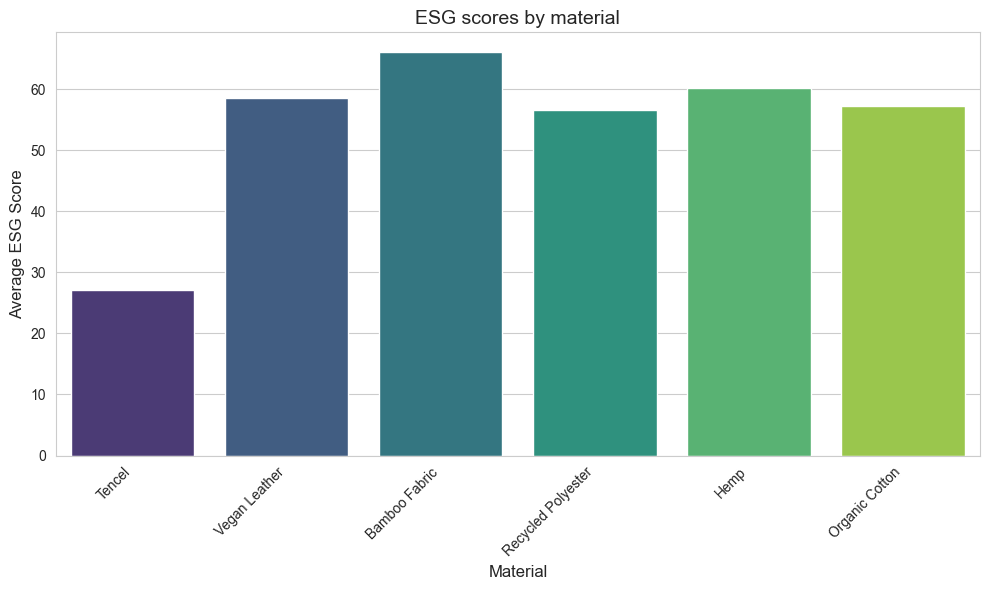

In [26]:
# Setting the style for better visuals
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='material', y='esg_score', data=df, estimator=np.mean, ci=None, palette='viridis')

plt.title('ESG scores by material', fontsize=14)
plt.xlabel('Material', fontsize=12)
plt.ylabel('Average ESG Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_23088\2944177192.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_id', y='esg_score', data=top_10, palette='Greens_r')
C:\Users\acer\AppData\Local\Temp\ipykernel_23088\2944177192.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_id', y='esg_score', data=bottom_10, palette='Reds')


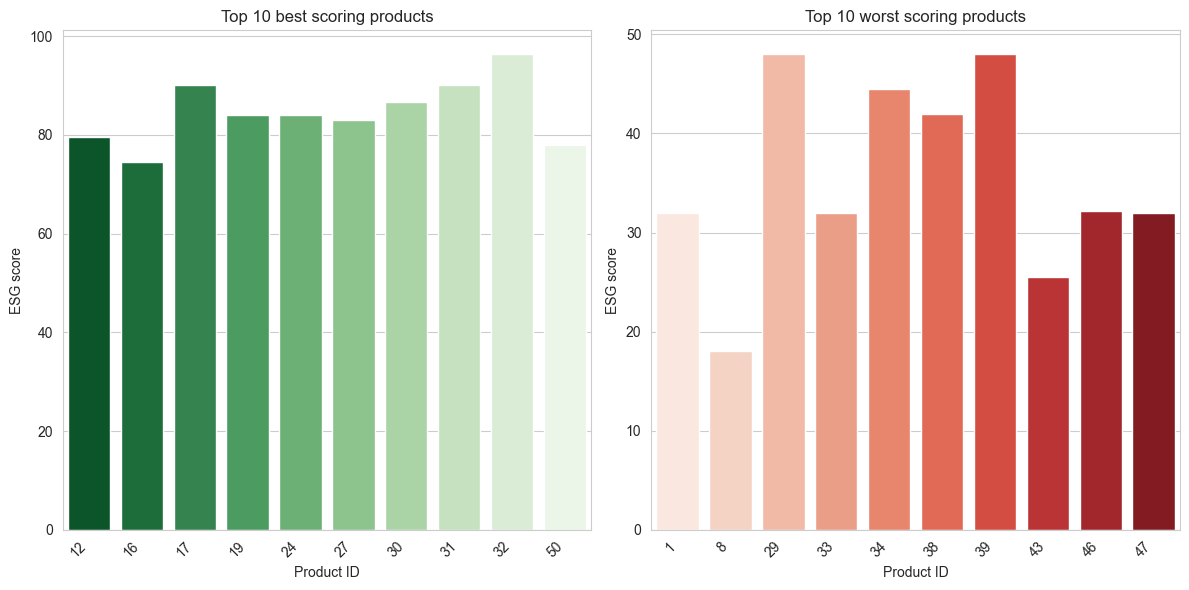

In [52]:
# Sorting by ESG score to get top 10 and bottom
top_10 = df.nlargest(10, 'esg_score')
bottom_10 = df.nsmallest(10, 'esg_score')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='product_id', y='esg_score', data=top_10, palette='Greens_r')
plt.title('Top 10 best scoring products', fontsize=12)
plt.xlabel('Product ID', fontsize=10)
plt.ylabel('ESG score', fontsize=10)
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.barplot(x='product_id', y='esg_score', data=bottom_10, palette='Reds')
plt.title('Top 10 worst scoring products', fontsize=12)
plt.xlabel('Product ID', fontsize=10)
plt.ylabel('ESG score', fontsize=10)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [53]:
df['esg_score']

0     32.000000
1     65.494779
2     70.000000
3     72.000000
4     55.969267
5     66.519615
6     66.599115
7     18.000000
8     57.017029
9     60.000000
10    64.000000
11    79.456326
12    60.000000
13    54.000000
14    72.000000
15    74.531982
16    90.000000
17    48.438234
18    84.000000
19    50.182218
20    68.836609
21    52.000000
22    48.111455
23    84.000000
24    52.000000
25    69.071892
26    83.096132
27    62.000000
28    48.000000
29    86.645181
30    90.000000
31    96.322974
32    32.000000
33    44.461015
34    67.404136
35    64.181667
36    49.603355
37    42.000000
38    48.000000
39    55.943807
40    50.000000
41    54.637736
42    25.510222
43    60.000000
44    64.000000
45    32.213701
46    32.000000
47    64.000000
48    66.238628
49    78.000000
Name: esg_score, dtype: float64